<a href="https://colab.research.google.com/github/bkn872/GL_Guru_Nov22/blob/main/Image%2Bclassifier%2B_%2BNB_2C%2BKNN_2C%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](GL_Logo.png "Title")

# Image Classifier - NB, SVM, KNN

### Author - Krishnav Bhudeo Dave

#### Engagement: Samsung 

##### Date - 26 April 2020

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Data Set - 

Domain: Mobile e-commerce

Data: http://ufldl.stanford.edu/housenumbers/

Also the data is attched as "SVHN_single_grey1.h5" along with this case study.

#### About this dataset

This data-set is Street View House Numbers where Images with many numbers. Clicked from various angles and houses.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Steps to perform:

##### 1. Import Libraries
#### 2. Import Data set & Train test split the data
##### 3. EDA
##### 4. Data Preparation
##### 5. Supervised Learning modeling
##### 6. Model Testing
##### 7. Improvisation

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 1. Import Libraries

In [ ]:
# Time
import time

# Import images data as h5 format
import h5py

# model pickling
import pickle 

# Text color
#pip install colorama
#from colorama import Fore,Style

# warnings handling
import warnings
warnings.filterwarnings("ignore")

# Train test split
from sklearn.model_selection import train_test_split

# Numbers
import numpy as np 
import pandas as pd 

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Model 
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

# model pickling
import pickle 

# Text color
#from colorama import Fore,Style

## Importing the Deep Learning libraries
import keras
import numpy as np
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


# warnings handling
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Questions ?

1. What is pickling a model ? How it is useful ?

2. What are warnings ? 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 2. Import Data set & Train test split the data

In [ ]:
# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/20_GRP4_Nov22A/03_Supervised_Learning/W3_Classification_NB_KNN/Mentor/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]

# Close this file
h5f.close()

# Shape and size of data
print("Training data size\n",X_train.shape,y_train1.shape)
print("\nTesting data size\n",X_test.shape,y_test1.shape)

Training data size
 (42000, 32, 32) (42000,)

Testing data size
 (18000, 32, 32) (18000,)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Questions ?

1. List different sources from where you can import data into python. Try understanding the python command for the same.

2. What is the default number of images <.head> command prints ? How to print 7 images ?

3. How to print bottom most images of the dataset ?

4. How to print images for range 100 - 200 ?

5. How to print specific image ?  (hint: loc or iloc commands)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 3. EDA

In [ ]:
# Display training data
X_train[0:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions:

1. What this data represents ?

2. How does it represent an image ?

3. How do we know which number is represented by the above data ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# Display training data target column
y_train1[0:1]

array([2], dtype=uint8)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions:

1. What this data represents ?

2. How does it represent an image ?

3. How do we know which number is represented by the above data ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

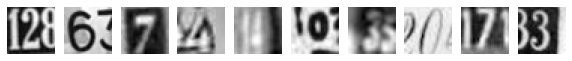

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")  # use cmap as "Greens" or "Blues" or "Reds"
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Assignment:

1. Print 100th imag and check the target

2. Answer why in the first image we see number "128" but the target is "2" ? How to decide this and who has decided this ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 4. Data Preparation

In [ ]:
# Reshape the images
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train[0])
print(X_test[0])

# Data shape
print('\n\nTraining set', X_train.shape, y_train1.shape)
print('\nTest set', X_test.shape, y_test1.shape)

[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]


Training set (42000, 1024) (42000,)

Test set (18000, 1024) (18000,)


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. What is image reshape ?

2. What is normalisation ? whay did we choose 255 as the number ?

3. Compare training data before and after normalization. What did you get out of this ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test = np_utils.to_categorical(y_test1)

# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

print("One hot encoded output:\n",y_test[0:5])

One hot encoded output:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. What is one hot encoding ? How many unique classes we have as target ?

2. Why did we on hot encode target column ?

3. Except one hot encoding do we have any other method to achieve the same ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# Flatten the images data 

# Training data
x_train = []
for i in range(42000):
    x_train.append(X_train[i,:].flatten())

# Testing data
x_test = []
for i in range(18000):
    x_test.append(X_test[i,:].flatten())

N=1000   # Try different values like 2000, 3000, 4000 .... 18000
    
x_train =x_train[:N] 
x_test =x_test[:N]

# Target     
y_train = y_train1[0:N]
y_test = y_test1[0:N]

   
# Print data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(y_train))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(y_test))


 Training data: 1000

 Training Target data: 1000

 Testing data: 1000

 Testing Target data: 1000


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Questions ?

1. Why do we mean by flatten the data ?

2. Wy do we need to flatten the data ? 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 5. Supervised Learning modeling

In [ ]:
# NB - Find the best NBs kernels

k=[BernoulliNB,GaussianNB,MultinomialNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(x_train, y_train)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(x_test, y_test))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.096
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.11
kernel is = <class 'sklearn.naive_bayes.MultinomialNB'> 	Score= 0.144


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. List differet NB methods ? 

2. What is Bernouli's NB method ? When to use this method ?

3. What is Gaussian NB method ? When to use this method ?

4. Any other hyper parameters we can alter to improve the prediction accuracy ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# NB - Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
NB_Accuracy=accuracy_score(y_test, y_pred, normalize = True)
#print(Fore.GREEN+"\nAccuracy using Naive Bayes : ", NB_Accuracy)

print("\nAccuracy using Naive Bayes : ", NB_Accuracy)

#Pickle the file
import pickle
if NB_Accuracy>=0.05:
    print("\nInitiating pickling the model")
    NB_Pickled = pickle.dumps(NB) 
    print("\nCompleted pickling the model")
else:
    print("\nModel with poor performance")

print("\nReload the pickled model")
NB_Pickled_Load = pickle.loads(NB_Pickled)

y_pred_1 = NB_Pickled_Load.predict(x_test)
NB_Accuracy_Pickled = accuracy_score(y_true=y_test, y_pred=y_pred_1)
print("\nAccuracy using Naive Bayes pickled model : ", NB_Accuracy_Pickled)


Accuracy using Naive Bayes :  0.144

Initiating pickling the model

Completed pickling the model

Reload the pickled model

Accuracy using Naive Bayes pickled model :  0.144


In [ ]:
# SVM - to find the best parameters

from sklearn.svm import SVC

c=np.arange(0.1,1.1,0.1)  # Range of C values

kernels=['linear','rbf','sigmoid','poly']  # Range of kernels

# Loop to find the best parameters for C and Kernels

for k in range (len(kernels)):
    for i in range (len(c)):
        SVM_Classifier = SVC(C=c[i],kernel=kernels[k])
        SVM_Classifier.fit(x_train, y_train)
        print ('C=',round(c[i],2),"\tKernel=",kernels[k],'\tScore=',SVM_Classifier.score(x_test, y_test))

C= 0.1 	Kernel= linear 	Score= 0.145
C= 0.2 	Kernel= linear 	Score= 0.15
C= 0.3 	Kernel= linear 	Score= 0.137
C= 0.4 	Kernel= linear 	Score= 0.14
C= 0.5 	Kernel= linear 	Score= 0.141
C= 0.6 	Kernel= linear 	Score= 0.139
C= 0.7 	Kernel= linear 	Score= 0.135
C= 0.8 	Kernel= linear 	Score= 0.133
C= 0.9 	Kernel= linear 	Score= 0.139
C= 1.0 	Kernel= linear 	Score= 0.133
C= 0.1 	Kernel= rbf 	Score= 0.109
C= 0.2 	Kernel= rbf 	Score= 0.124
C= 0.3 	Kernel= rbf 	Score= 0.129
C= 0.4 	Kernel= rbf 	Score= 0.15
C= 0.5 	Kernel= rbf 	Score= 0.18
C= 0.6 	Kernel= rbf 	Score= 0.196
C= 0.7 	Kernel= rbf 	Score= 0.218
C= 0.8 	Kernel= rbf 	Score= 0.234
C= 0.9 	Kernel= rbf 	Score= 0.238
C= 1.0 	Kernel= rbf 	Score= 0.251
C= 0.1 	Kernel= sigmoid 	Score= 0.096
C= 0.2 	Kernel= sigmoid 	Score= 0.096
C= 0.3 	Kernel= sigmoid 	Score= 0.096
C= 0.4 	Kernel= sigmoid 	Score= 0.096
C= 0.5 	Kernel= sigmoid 	Score= 0.096
C= 0.6 	Kernel= sigmoid 	Score= 0.096
C= 0.7 	Kernel= sigmoid 	Score= 0.096
C= 0.8 	Kernel= sigmoid 	Sco

In [ ]:
# SVM - Model using best parameters from above

from sklearn.svm import SVC
SVM = SVC(C=0.8,kernel='poly')
SVM.fit(x_train, y_train)
SVM_Accuracy=SVM.score(x_test, y_test)
print("\nAccuracy using SVM : ", SVM_Accuracy)

#Pickle the file
import pickle
if SVM_Accuracy>=0.10:
    print("\nInitiating pickling the model")
    SVM_Pickled = pickle.dumps(SVM) 
    print("\nCompleted pickling the model")
else:
    print("\nModel with poor performance")

print("\nReload the pickled model")
SVM_Pickled_Load = pickle.loads(SVM_Pickled)

y_pred_1 = SVM_Pickled_Load.predict(x_test)
SVM_Accuracy_Pickled = accuracy_score(y_true=y_test, y_pred=y_pred_1)
print("\nAccuracy using SVM pickled model : ", SVM_Accuracy_Pickled)


Accuracy using SVM :  0.345

Initiating pickling the model

Completed pickling the model

Reload the pickled model

Accuracy using SVM pickled model :  0.345


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. What C value does ? How it is significant ?

2. Select the best value of C from the above.

3. Can we have value of C greater than 1 ? Upto what value we can go ?

4. What does kernel do ? How it is significant ?

5. Select the best value of kernel from the above.

6. What does GAMMA do ? How it is significant ?

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# KNN - choosing the K value

# creating odd list of K for KNN
myList = list(range(2,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. What K value does ? How it is significant ?

2. Select the best value of C from the above.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

In [ ]:
# KNN - Model using the best parameters form above

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train, y_train)
# predict the response
y_pred = KNN.predict(x_test)
# evaluate accuracy
KNN_Accuracy=accuracy_score(y_test, y_pred)
print("\nAccuracy using KNN : ", KNN_Accuracy)


#Pickle the file
import pickle
if KNN_Accuracy>=0.1:
    print("\nInitiating pickling the model")
    KNN_Pickled = pickle.dumps(KNN) 
    print("\nCompleted pickling the model")
else:
    print("\nModel with poor performance")

print("\nReload the pickled model")
KNN_Pickled_Load = pickle.loads(KNN_Pickled)

y_pred_1 = KNN_Pickled_Load.predict(x_test)
KNN_Accuracy_Pickled = accuracy_score(y_true=y_test, y_pred=y_pred_1)
print("\nAccuracy using KNN pickled model : ", KNN_Accuracy_Pickled)


Accuracy using KNN :  0.269

Initiating pickling the model

Completed pickling the model

Reload the pickled model

Accuracy using KNN pickled model :  0.269


#### 9. Model Testing

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Assignment

Use the above model to predict accuracy for any new data.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### 10. Improvisation

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Questions ?

1. Do we need so many columns/fetures/pixels ? if yes, then how we will do that ?

2. Can we delete some columns/fetures/pixels ?

3. Deleting columns/fetures/pixels will impact our model to form pattern and in turn prediction ?

4. Can we use more combinations of hyperparameters to achieve more accuracy ?

5. Any other methods we can employ to improvise ? (hint: data split, data shuffle etc.)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Assignment

Use the above model to increase the prediction accuracy. Model hould not be be an overfit model

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

                                  End of case study